In [44]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_experiment1.nc')
df2 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_experiment2.nc')
df3 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_experiment6.nc')
df4 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_experiment7.nc')

In [104]:
mae = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/MAE_experiment1.nc')
mae2 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/MAE_experiment2.nc')
mae3 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/MAE_experiment6.nc')
mae4 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/MAE_experiment7.nc')

In [106]:
df4 = df4.where(df4< 550, np.nan)
df2 = df2.where(df2< 550, np.nan)
mae2 = mae2.where(mae2<500, np.nan)
mae4 = mae4.where(mae4<500, np.nan)

In [150]:
ax[0,0].get_legend_handles_labels()

AttributeError: 'AxesSubplot' object has no attribute 'get_handles_labels'

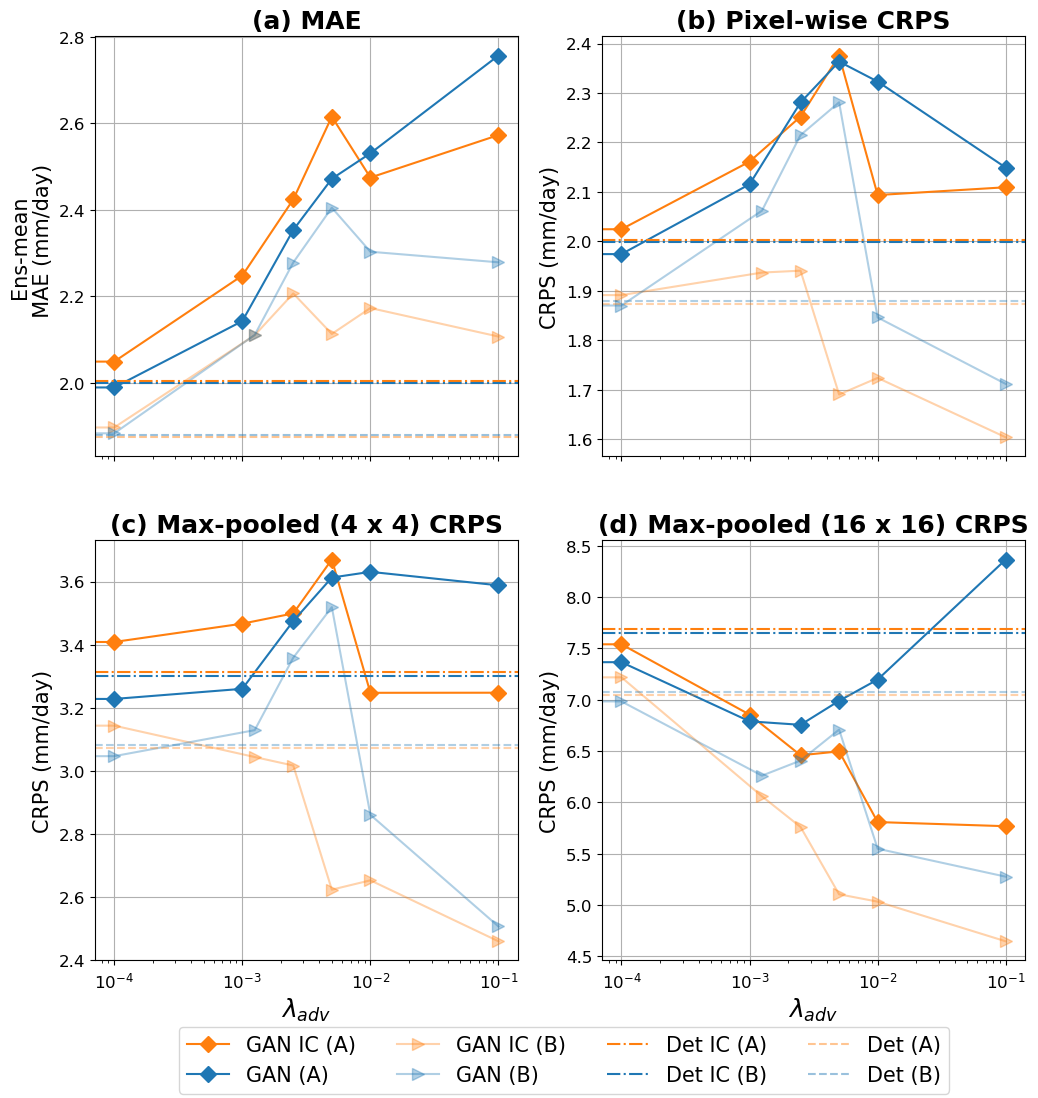

In [173]:
fig, ax = plt.subplots(2,2, figsize = (12, 12), sharex=True)

mae.mae.mean(["lat","lon"]).plot(ax = ax[0,0], color ='tab:orange', marker ='D',ms =8, label ='GAN IC (A)')
mae2.mae.mean(["lat","lon"]).plot(ax = ax[0,0], color ='tab:blue', marker ='D',ms =8, label ='GAN (A)')
mae3.mae.mean(["lat","lon"]).plot(ax = ax[0,0], color ='tab:orange', marker ='>', alpha=0.35,ms =8, label ='GAN IC (B)')
mae4.mae.mean(["lat","lon"]).plot(ax = ax[0,0], color ='tab:blue', marker ='>', alpha =0.35,ms =8, label ='GAN (B)')
ax[0,0].axhline(mae.mae.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='dashdot', label = 'Det IC (A)')
ax[0,0].axhline(mae2.mae.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='dashdot', label = 'Det IC (B)')
ax[0,0].axhline(mae3.mae.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='--', alpha =0.45, label = 'Det (A)')
ax[0,0].axhline(mae4.mae.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='--', alpha =0.45, label = 'Det (B)')
ax[0,0].set_title('(a) MAE', fontsize =18, weight='bold')
ax[0,0].set_ylabel('Ens-mean\n  MAE (mm/day)', fontsize =15)
handles, labels = ax[0,0].get_legend_handles_labels()
df.crps_pixel.mean(["lat","lon"]).plot(ax = ax[0,1], color ='tab:orange', marker ='D',ms =8)
df3.crps_pixel.mean(["lat","lon"]).plot(ax = ax[0,1], color ='tab:orange', marker ='>', alpha =0.35,ms =8)

df2.crps_pixel.mean(["lat","lon"]).plot(ax = ax[0,1], color ='tab:blue', marker ='D',ms =8)
df4.crps_pixel.mean(["lat","lon"]).plot(ax = ax[0,1], color ='tab:blue', marker ='>', alpha =0.35,ms =8)

ax[0,1].axhline(df.crps_pixel.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='dashdot')
ax[0,1].axhline(df3.crps_pixel.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='--', alpha =0.35)
ax[0,1].axhline(df2.crps_pixel.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='dashdot')
ax[0,1].axhline(df4.crps_pixel.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='--', alpha =0.35)
ax[0,1].set_title('(b) Pixel-wise CRPS', fontsize =18, weight='bold')
ax[0,1].set_ylabel('CRPS (mm/day)', fontsize =15)

df.crps_pixel4pooled.mean(["lat","lon"]).plot(ax = ax[1,0], color ='tab:orange', marker ='D',ms =8)
df3.crps_pixel4pooled.mean(["lat","lon"]).plot(ax = ax[1,0], color ='tab:orange', marker ='>', alpha =0.35,ms =8)

df2.crps_pixel4pooled.mean(["lat","lon"]).plot(ax = ax[1,0], color ='tab:blue', marker ='D',ms =8)
df4.crps_pixel4pooled.mean(["lat","lon"]).plot(ax = ax[1,0], color ='tab:blue', marker ='>', alpha =0.35,ms =8)
ax[1, 0].set_title('(c) Max-pooled (4 x 4) CRPS', fontsize =18, weight='bold')
ax[1,0].set_ylabel('CRPS (mm/day)', fontsize =15)

ax[1,0].axhline(df.crps_pixel4pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='dashdot')
ax[1,0].axhline(df3.crps_pixel4pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='--', alpha =0.35)
ax[1,0].axhline(df2.crps_pixel4pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='dashdot')
ax[1,0].axhline(df4.crps_pixel4pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='--', alpha =0.35)
df.crps_pixel16pooled.mean(["lat","lon"]).plot(ax = ax[1,1], color ='tab:orange', marker ='D',ms =8)
df3.crps_pixel16pooled.mean(["lat","lon"]).plot(ax = ax[1,1], color ='tab:orange', marker ='>', alpha =0.35,ms =8)

df2.crps_pixel16pooled.mean(["lat","lon"]).plot(ax = ax[1,1], color ='tab:blue', marker ='D',ms =8)
df4.crps_pixel16pooled.mean(["lat","lon"]).plot(ax = ax[1,1], color ='tab:blue', marker ='>', alpha =0.35,ms =8)

ax[1,1].axhline(df.crps_pixel16pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='dashdot')
ax[1,1].axhline(df3.crps_pixel16pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:orange', ls ='--', alpha =0.35)
ax[1,1].axhline(df2.crps_pixel16pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='dashdot')
ax[1,1].axhline(df4.crps_pixel16pooled.mean(["lat","lon"]).isel(experiment=0), color ='tab:blue', ls ='--', alpha =0.35)
ax[1, 1].set_title('(d) Max-pooled (16 x 16) CRPS', fontsize =18, weight='bold')
ax[1,1].set_ylabel('CRPS (mm/day)', fontsize =15)
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xlabel('$\lambda_{adv}$', fontsize =18)
ax[1,0].set_xlabel('$\lambda_{adv}$', fontsize =18)
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
ax[0,0].set_xlabel(' ', fontsize =15)
ax[0,1].set_xlabel(' ', fontsize =15)
ax[0,0].tick_params(labelsize =12)
ax[0,1].tick_params(labelsize =12)
ax[1,1].tick_params(labelsize =12)
ax[1,0].tick_params(labelsize =12)
fig.legend(handles, labels, loc ='lower center', ncol =4, fontsize =15, bbox_to_anchor = (0.47, -0.005))
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_MAE_Nor.png', dpi =700, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_MAE_Nor.pdf', dpi =700, bbox_inches ='tight')

In [156]:
handles

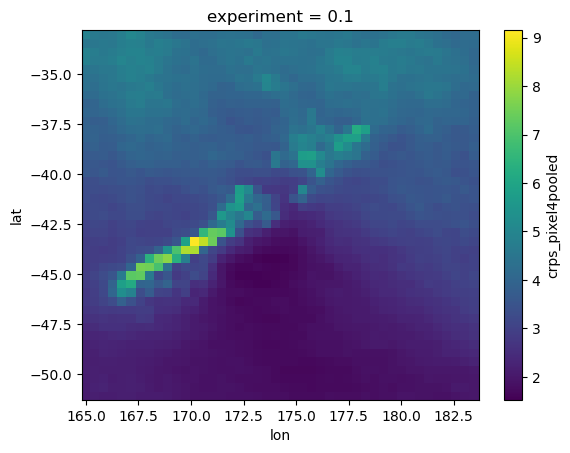

In [33]:
#df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_experiment1.nc')
#df2 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/CRPS_experiment2.nc')
df3_ = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/MAE_experiment6.nc')
df4_ = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/intermediate_outputs/crps_outputs/MAE_experiment7.nc')

In [45]:
z1 = df3_.where(df3_< 15, np.nan).mean(["lat","lon"])
z2 = df4_.where(df4_< 15, np.nan).mean(["lat","lon"])

In [ ]:
fig, ax = plt.subplots()


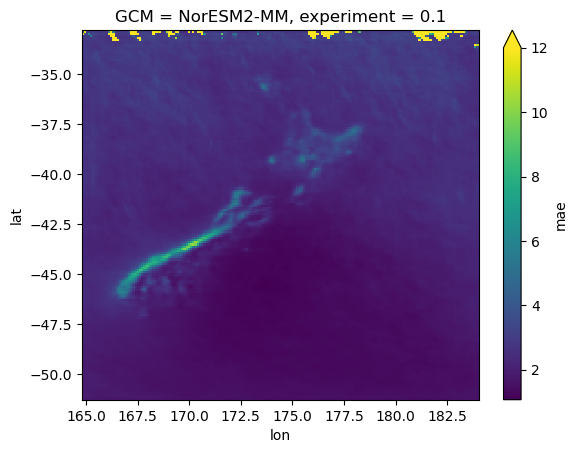

In [42]:
df4_.isel(experiment =-1).mae.plot(vmax =12)

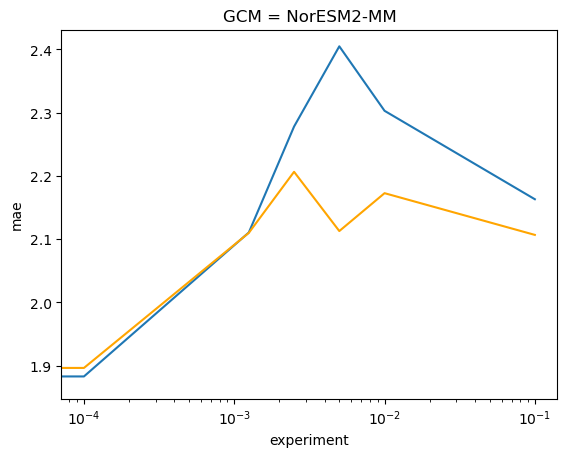

In [47]:
fig, ax = plt.subplots()
z2.mae.plot()
z1.mae.plot(color ='orange')
ax.set_xscale('log')

In [35]:
z2.crps_pixel16pooled.plot()
z1.crps_pixel16pooled.plot(color ='orange')
plt.xscale('log')


AttributeError: 'Dataset' object has no attribute 'crps_pixel16pooled'